# Task: Build a model for mechanical design

Data: https://www.kaggle.com/daalgi/fem-simulations/download

Build simple machine learning modeling using Python scikit-learn, Pandas, and Numpy.

Objective variable: Mr_t, Mt_t, Mr_c, Mt_c.

Dummy variables: METROMICRO, UR, IECC_Climate_Pub

In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.regressor import PredictionError, ResidualsPlot
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
FILE1 = '40semi-randoms.csv'
FILE2 = '1000randoms.csv'
FILE3 = '5184doe.csv'

In [5]:
df_sem = pd.read_csv(FILE1)
df_sem.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2300,0.9,35,33000,19.0,1.5,1.2,1.0,0.108773,0.082759,0.108773,0.082759
1,2,10,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-0.935414,-0.265899,1.143375,0.822603
2,3,18,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-1.681867,-0.708710,2.018585,1.262159
3,4,26,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-2.213149,-1.138414,2.947126,1.706759
4,5,0,3800,0.9,50,32000,21.0,1.3,1.1,1.1,0.098256,0.070389,0.098256,0.070389


In [8]:
df_sem.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.0000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,13.500000,3160.00000,1.000000,50.000000,32700.00000,19.7000,1.220000,1.40000,1.000000,-1.533506,-0.700243,2.261644,1.368414
std,11.690452,9.753369,697.54147,0.101274,10.127394,1090.75368,1.5558,0.174238,0.23094,0.090582,1.273105,0.680775,1.700498,0.945984
min,1.000000,0.000000,2300.00000,0.900000,35.000000,31000.00000,18.0000,1.000000,1.10000,0.900000,-4.366151,-2.198700,0.081514,0.058819
25%,10.750000,7.500000,2600.00000,0.900000,45.000000,32000.00000,18.5000,1.100000,1.20000,0.900000,-2.322725,-1.208830,0.912253,0.655877
50%,20.500000,14.000000,3000.00000,1.000000,50.000000,33000.00000,19.0000,1.200000,1.40000,1.000000,-1.643476,-0.583840,2.189477,1.390598
75%,30.250000,20.000000,3800.00000,1.100000,55.000000,33500.00000,21.0000,1.300000,1.60000,1.100000,-0.566154,-0.133816,3.501641,2.016928
max,40.000000,26.000000,4100.00000,1.100000,65.000000,34000.00000,22.0000,1.500000,1.70000,1.100000,0.218887,0.155698,5.661348,3.311976


In [9]:
df_ran = pd.read_csv(FILE2) 
df_ran.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,13.505678,3534.451046,0.996259,77.529151,33430.625405,20.459594,1.208397,1.485011,1.215343,-1.766404,-0.807850,2.485259,1.575196
std,288.819436,8.809854,882.341655,0.055444,24.975897,2042.570603,1.390192,0.232068,0.296533,0.231364,1.314094,0.696360,1.813876,1.026022
min,1.000000,0.000000,2001.620110,0.900260,35.208290,30054.161790,18.008770,0.800450,1.006210,0.807820,-4.978701,-2.536163,0.067049,0.043397
25%,250.750000,7.513590,2726.021640,0.949420,56.180760,31485.932910,19.266290,1.034380,1.211360,1.023330,-2.693054,-1.301825,0.315496,0.645445
50%,500.500000,15.500830,3611.351895,0.998115,77.759420,33454.730445,20.552740,1.211540,1.486085,1.251735,-1.952675,-0.800057,2.509531,1.717396
75%,750.250000,20.251790,4308.607900,1.040720,99.228270,35274.470300,21.647700,1.406920,1.738110,1.413470,-0.404063,-0.045443,3.774859,2.292633
max,1000.000000,25.990080,4987.486220,1.099790,118.551940,36977.723190,22.918060,1.598400,1.994710,1.598340,0.303619,0.241073,7.418611,3.979341


In [10]:
df_ran.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,13.505678,3534.451046,0.996259,77.529151,33430.625405,20.459594,1.208397,1.485011,1.215343,-1.766404,-0.807850,2.485259,1.575196
std,288.819436,8.809854,882.341655,0.055444,24.975897,2042.570603,1.390192,0.232068,0.296533,0.231364,1.314094,0.696360,1.813876,1.026022
min,1.000000,0.000000,2001.620110,0.900260,35.208290,30054.161790,18.008770,0.800450,1.006210,0.807820,-4.978701,-2.536163,0.067049,0.043397
25%,250.750000,7.513590,2726.021640,0.949420,56.180760,31485.932910,19.266290,1.034380,1.211360,1.023330,-2.693054,-1.301825,0.315496,0.645445
50%,500.500000,15.500830,3611.351895,0.998115,77.759420,33454.730445,20.552740,1.211540,1.486085,1.251735,-1.952675,-0.800057,2.509531,1.717396
75%,750.250000,20.251790,4308.607900,1.040720,99.228270,35274.470300,21.647700,1.406920,1.738110,1.413470,-0.404063,-0.045443,3.774859,2.292633
max,1000.000000,25.990080,4987.486220,1.099790,118.551940,36977.723190,22.918060,1.598400,1.994710,1.598340,0.303619,0.241073,7.418611,3.979341


In [7]:
df_doe = pd.read_csv(FILE3)
df_doe.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2000,0.9,25,30000,17,0.8,1.0,0.8,0.082100,0.055648,0.082100,0.055648
1,2,10,2000,0.9,25,30000,17,0.8,1.0,0.8,-0.597084,-0.233470,1.160648,0.605016
2,3,18,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.094196,-0.566130,1.908188,0.947770
3,4,26,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.416485,-0.865039,2.844706,1.310545
4,5,0,2000,0.9,25,37000,17,0.8,1.0,0.8,0.079570,0.054213,0.079570,0.054213


In [11]:
df_doe.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.000000
mean,2592.500000,13.500000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.629734,-0.810779,2.650433,1.518741
std,1496.636228,9.631609,1500.144697,0.10001,25.002412,3500.337626,2.449726,0.32663,0.408288,0.32663,1.426607,0.859657,2.475025,1.226075
min,1.000000,0.000000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-6.027412,-2.968574,0.024414,0.014080
25%,1296.750000,7.500000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-2.402849,-1.191169,0.251651,0.458440
50%,2592.500000,14.000000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.554450,-0.620024,2.138881,1.349318
75%,3888.250000,20.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,-0.176328,0.018693,3.716968,2.413945
max,5184.000000,26.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,0.251917,0.201895,9.408445,4.585227


In [15]:
# X and y for supervised learning
X = df_doe.drop(['Sample','Mr_t','Mt_t','Mr_c','Mt_c'],axis = 1)
y = df_doe[['Mr_t','Mt_t','Mr_c','Mt_c']]

In [16]:
X.head()

,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3
0,0,2000,0.9,25,30000,17,0.8,1.0,0.8
1,10,2000,0.9,25,30000,17,0.8,1.0,0.8
2,18,2000,0.9,25,30000,17,0.8,1.0,0.8
3,26,2000,0.9,25,30000,17,0.8,1.0,0.8
4,0,2000,0.9,25,37000,17,0.8,1.0,0.8


In [17]:
y.head()

,Mr_t,Mt_t,Mr_c,Mt_c
0,0.082100,0.055648,0.082100,0.055648
1,-0.597084,-0.233470,1.160648,0.605016
2,-1.094196,-0.566130,1.908188,0.947770
3,-1.416485,-0.865039,2.844706,1.310545
4,0.079570,0.054213,0.079570,0.054213


In [18]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

,Mr_t,Mt_t,Mr_c,Mt_c
1413,-0.710824,-0.204942,0.918925,0.798837
757,-1.314879,-0.649773,2.792705,1.603546
4614,-1.463122,-0.551667,2.036230,1.207922
1256,0.071101,0.053778,0.071101,0.053778
3461,-0.597158,-0.214864,1.254834,0.693979


# Normalization

In [19]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [35]:
y_train.head()

,Mr_t,Mt_t,Mr_c,Mt_c
4512,0.185633,0.144388,0.185633,0.144388
4351,-5.107102,-2.667759,6.914475,3.944978
1034,-1.489578,-0.605752,1.336216,1.252242
3753,-1.853721,-0.713154,2.984455,1.757100
2687,-4.098158,-2.665277,7.239714,3.872183


Module to Plot Figure

In [92]:
def plot_result(y_test,y_pred):
    figure, axes = plt.subplots(2, 2,figsize = (10,10))
    
    row,col = 0, 0
    r2_00 = r2_score(y_test['Mr_t'], y_pred['Mr_t'])
    sns.regplot(x=y_test['Mr_t'],y = y_pred['Mr_t'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mr_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-5,-1,'R2 = {:3.3f}'.format(r2_00),fontsize = 16)
    
    row,col = 0, 1
    r2_01 = r2_score(y_test['Mt_t'], y_pred['Mt_t'])
    sns.regplot(x=y_test['Mt_t'],y = y_pred['Mt_t'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mt_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-2.5,-0.5,'R2 = {:3.3f}'.format(r2_01),fontsize = 16)
    
    row,col = 1, 0
    r2_10 = r2_score(y_test['Mr_c'], y_pred['Mr_c'])
    sns.regplot(x=y_test['Mr_c'],y = y_pred['Mr_c'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mr_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1,7,'R2 = {:3.3f}'.format(r2_10),fontsize = 16)
    
    row,col = 1, 1
    r2_11 = r2_score(y_test['Mt_c'], y_pred['Mt_c'])
    sns.regplot(x=y_test['Mt_c'],y = y_pred['Mt_c'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mt_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-1,3,'R2 = {:3.3f}'.format(r2_11),fontsize = 16)
    

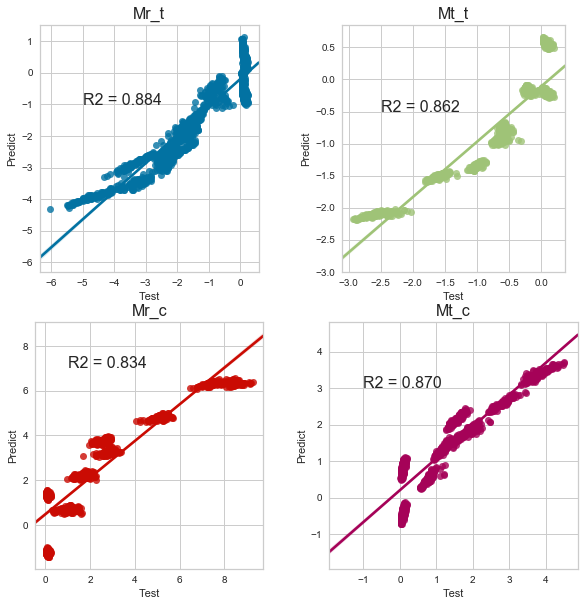

In [93]:
plot_result(y_test,y_pred)

# Simple ML Regressors

### k-neighbors regression

k-nearest neighbors score: 0.9437070816265208


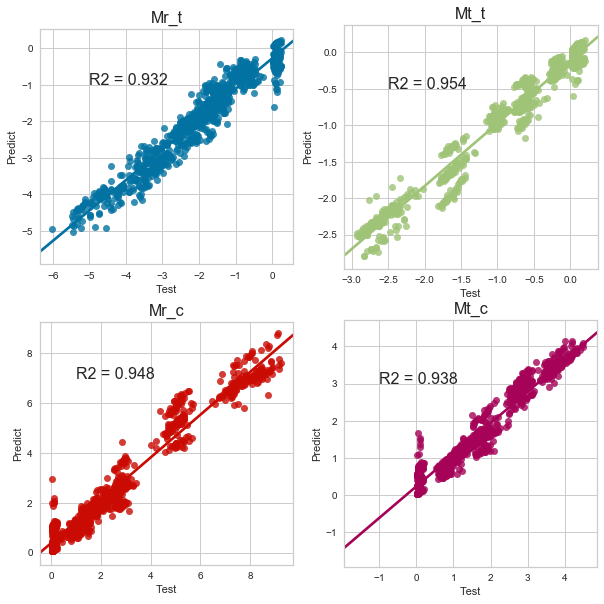

In [80]:
# k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(X_train,y_train)
print('k-nearest neighbors score:', knr.score(X_test, y_test))
y_pred = pd.DataFrame(knr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)

k-nearest neighbors score: 0.850830682101047


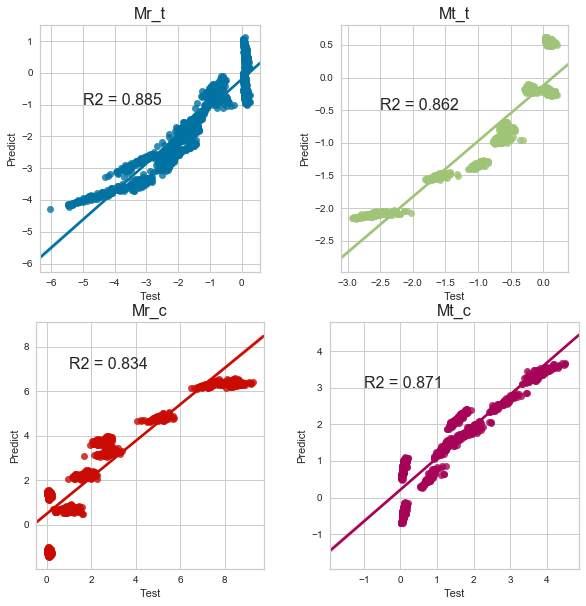

In [79]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
print('k-nearest neighbors score:', lr.score(X_test, y_test))
y_pred = pd.DataFrame(lr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)  

k-nearest neighbors score: 0.8508045347744558


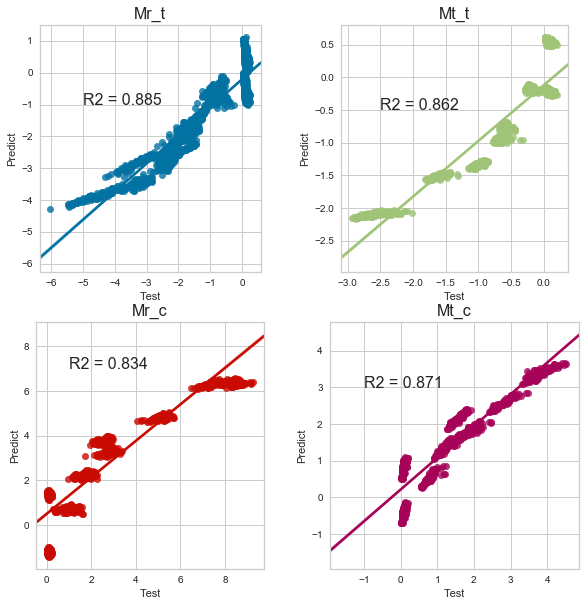

In [81]:
# Ridge regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5)

rr.fit(X_train,y_train)
print('k-nearest neighbors score:', rr.score(X_test, y_test))
y_pred = pd.DataFrame(rr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)   

k-nearest neighbors score: 0.8505535172657176


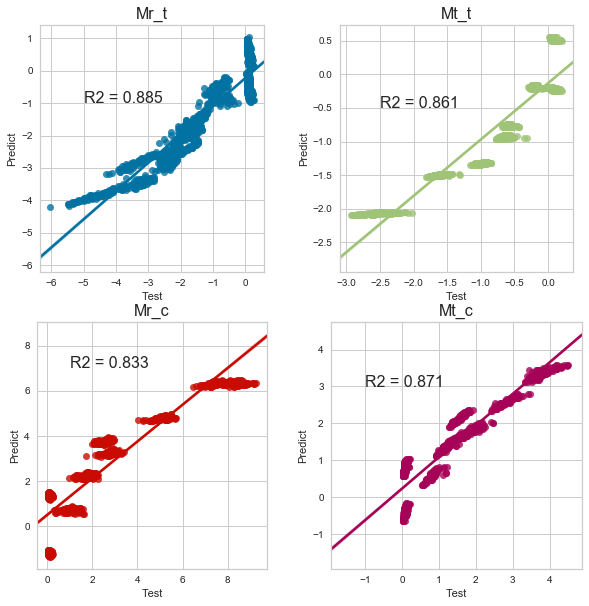

In [82]:
# Lasso
from sklearn.linear_model import Lasso
lsr = Lasso(alpha = 0.01, max_iter=10000)

lsr.fit(X_train,y_train)
print('k-nearest neighbors score:', lsr.score(X_test, y_test))
y_pred = pd.DataFrame(lsr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)   

k-nearest neighbors score: 0.9906733041266385


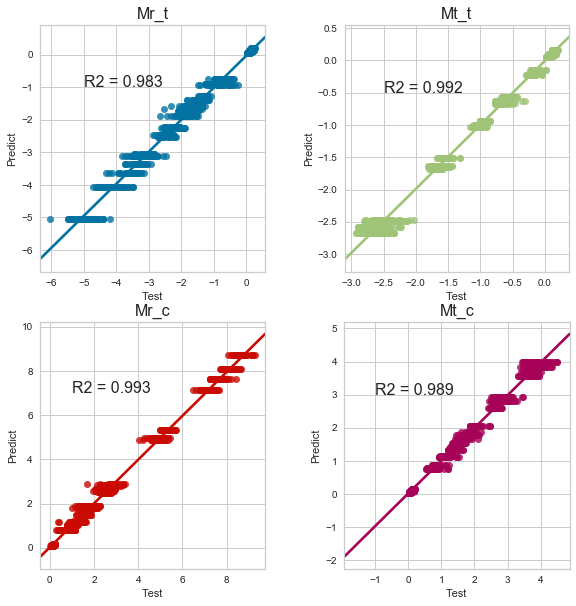

In [83]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(X_train,y_train)
print('k-nearest neighbors score:', dtr.score(X_test, y_test))
y_pred = pd.DataFrame(dtr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)    

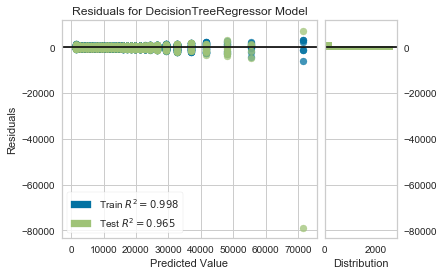

In [23]:
visualizer2 = ResidualsPlot(dtr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

k-nearest neighbors score: 0.9736368628820085


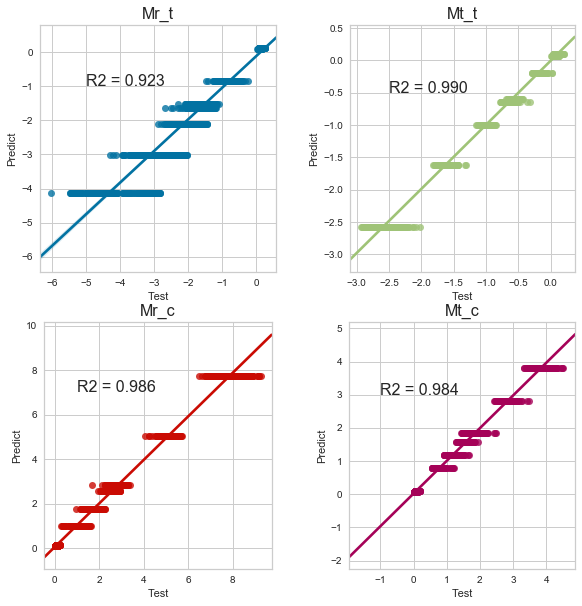

In [84]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=1000)

rfr.fit(X_train,y_train)
print('k-nearest neighbors score:', rfr.score(X_test, y_test))
y_pred = pd.DataFrame(rfr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

k-nearest neighbors score: 0.8467558558207617


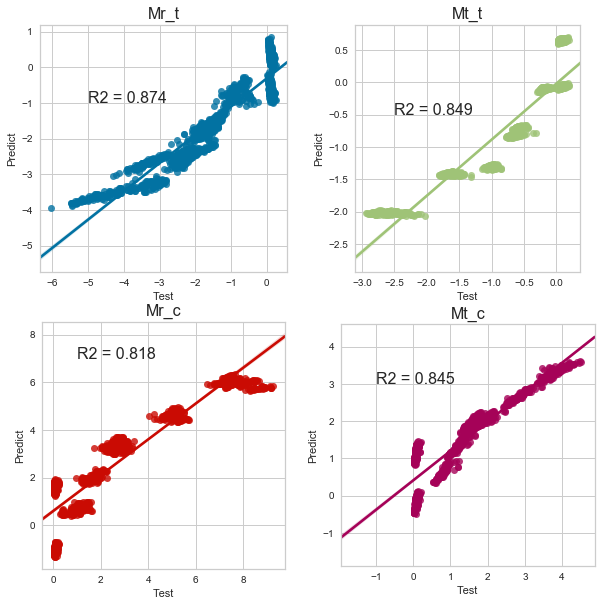

In [88]:
# Support Vector Machines
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
# svmr = SVR(gamma = 'scale',C = 1.0, epsilon = 0.2)

svmr = SVR(kernel='linear', gamma='auto')
mreg_svr = MultiOutputRegressor(svmr)

mreg_svr.fit(X_train,y_train)
print('k-nearest neighbors score:', mreg_svr.score(X_test, y_test))
y_pred = pd.DataFrame(mreg_svr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

stochastic gradient descent regressor score: 0.8626372372871669


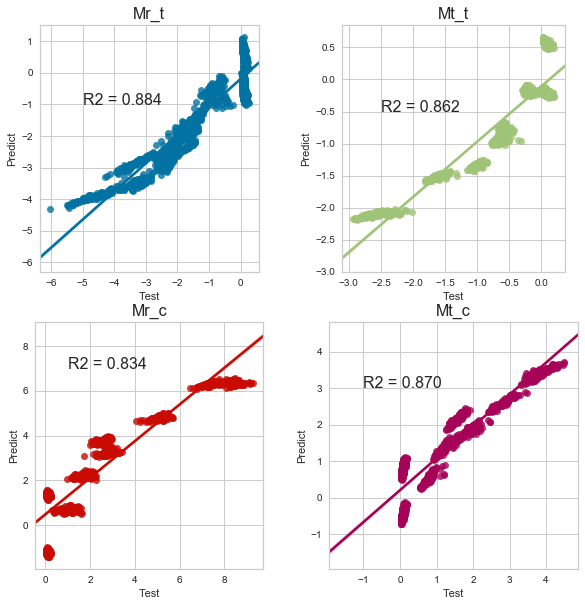

In [89]:
# stochastic gradient descent regressor
from sklearn import linear_model

sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
mreg_sgdr = MultiOutputRegressor(sgdr)

mreg_sgdr.fit(X_train,y_train)
print('stochastic gradient descent regressor score:', mreg_sgdr.score(X_test, y_test))
y_pred = pd.DataFrame(mreg_sgdr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

k-nearest neighbors score: 0.9939428394555938


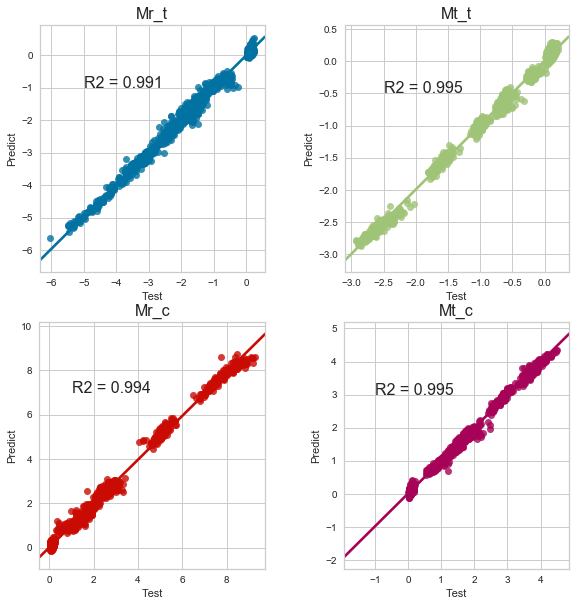

In [87]:
# Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()

mlpr.fit(X_train,y_train)
print('k-nearest neighbors score:', mlpr.score(X_test, y_test))
y_pred = pd.DataFrame(mlpr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 